In [1]:
import pandas as pd
coverage = pd.read_csv("../input/spring-petclinic/jacoco.csv", usecols=[1,2,7,8])
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24
1,org.springframework.samples.petclinic.model,NamedEntity,1,4
2,org.springframework.samples.petclinic.model,Specialty,0,1
3,org.springframework.samples.petclinic.model,PetType,0,1
4,org.springframework.samples.petclinic.model,Vets,4,0


In [2]:
coverage['LINES'] = coverage.LINE_COVERED + coverage.LINE_MISSED
coverage['RATIO'] = coverage.LINE_COVERED / coverage.LINES
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,LINES,RATIO
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8
2,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0
3,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


In [3]:
coverage[coverage.RATIO == 0]

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,LINES,RATIO
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0
19,org.springframework.samples.petclinic.util,EntityUtils,6,0,6,0.0
21,org.springframework.samples.petclinic.reposito...,JdbcVisitRowMapper,7,0,7,0.0
22,org.springframework.samples.petclinic.reposito...,JdbcPetRepositoryImpl,33,0,33,0.0
23,org.springframework.samples.petclinic.reposito...,JdbcVetRepositoryImpl,17,0,17,0.0
24,org.springframework.samples.petclinic.reposito...,JdbcPetRowMapper,9,0,9,0.0
25,org.springframework.samples.petclinic.reposito...,JdbcVisitRepositoryImpl,26,0,26,0.0
26,org.springframework.samples.petclinic.reposito...,JdbcPet,7,0,7,0.0
27,org.springframework.samples.petclinic.reposito...,JdbcPetVisitExtractor,8,0,8,0.0
28,org.springframework.samples.petclinic.reposito...,JdbcOwnerRepositoryImpl,43,0,43,0.0


In [4]:
coverage = coverage.sort_values(by="RATIO")
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,LINES,RATIO
21,org.springframework.samples.petclinic.reposito...,JdbcVisitRowMapper,7,0,7,0.0
19,org.springframework.samples.petclinic.util,EntityUtils,6,0,6,0.0
22,org.springframework.samples.petclinic.reposito...,JdbcPetRepositoryImpl,33,0,33,0.0
28,org.springframework.samples.petclinic.reposito...,JdbcOwnerRepositoryImpl,43,0,43,0.0
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


In [5]:
coverage['FQN'] = coverage.PACKAGE + "." + coverage.CLASS
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,LINES,RATIO,FQN
21,org.springframework.samples.petclinic.reposito...,JdbcVisitRowMapper,7,0,7,0.0,org.springframework.samples.petclinic.reposito...
19,org.springframework.samples.petclinic.util,EntityUtils,6,0,6,0.0,org.springframework.samples.petclinic.util.Ent...
22,org.springframework.samples.petclinic.reposito...,JdbcPetRepositoryImpl,33,0,33,0.0,org.springframework.samples.petclinic.reposito...
28,org.springframework.samples.petclinic.reposito...,JdbcOwnerRepositoryImpl,43,0,43,0.0,org.springframework.samples.petclinic.reposito...
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0,org.springframework.samples.petclinic.model.Vets


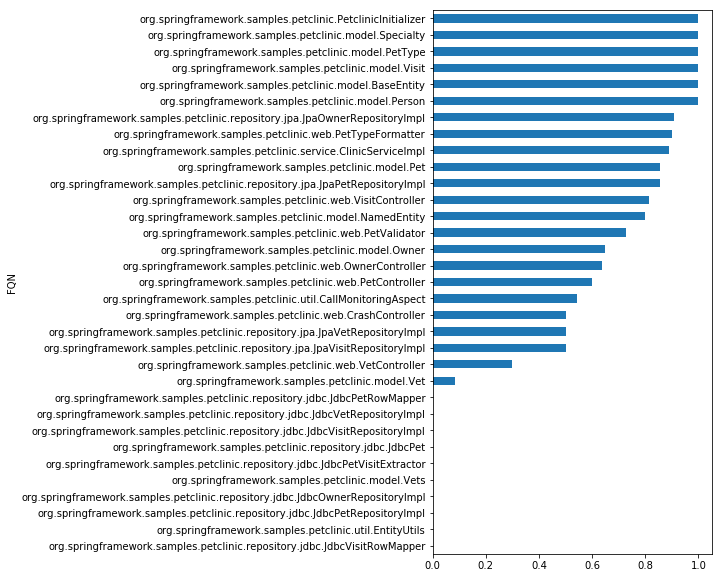

In [6]:
%matplotlib inline
coverage.set_index(coverage['FQN']).RATIO.plot(kind='barh', figsize=(5,10))

In [7]:
coverage.groupby("PACKAGE").agg({'LINES' : 'sum', 'RATIO' : 'mean'})

,LINES,RATIO
PACKAGE,,
org.springframework.samples.petclinic,24,1.000000
org.springframework.samples.petclinic.model,108,0.739048
org.springframework.samples.petclinic.repository.jdbc,150,0.000000
org.springframework.samples.petclinic.repository.jpa,28,0.691558
org.springframework.samples.petclinic.service,18,0.888889
org.springframework.samples.petclinic.util,30,0.270833
org.springframework.samples.petclinic.web,115,0.639809


In [8]:
coverage.to_csv(
    "../vis/test_flare.csv", 
    columns=['FQN', 'LINES', 'RATIO'],
    header=['id', 'value', "ratio"],
    index=None)

In [40]:
features = coverage[['RATIO']].copy()
features.head()

,RATIO
21,0.0
19,0.0
22,0.0
28,0.0
4,0.0


In [92]:
features = coverage[['RATIO']].copy()
features = features.join(coverage['PACKAGE'].str.split(".", expand=True).add_prefix("pck_"))
features.head()

,RATIO,pck_0,pck_1,pck_2,pck_3,pck_4,pck_5
21,0.0,org,springframework,samples,petclinic,repository,jdbc
19,0.0,org,springframework,samples,petclinic,util,None
22,0.0,org,springframework,samples,petclinic,repository,jdbc
28,0.0,org,springframework,samples,petclinic,repository,jdbc
4,0.0,org,springframework,samples,petclinic,model,None


In [93]:
import re
def splitCamelCase(s):
    return pd.Series(re.sub('([a-z])([A-Z])', r'\1 \2', s).split())

arrayOfTokens = coverage['CLASS'].apply(splitCamelCase)
arrayOfTokens.head()

,0,1,2,3
21,Jdbc,Visit,Row,Mapper
19,Entity,Utils,NaN,NaN
22,Jdbc,Pet,Repository,Impl
28,Jdbc,Owner,Repository,Impl
4,Vets,NaN,NaN,NaN


In [94]:
features = features.join(arrayOfTokens.add_prefix("cls_"))
features.head()

,RATIO,pck_0,pck_1,pck_2,pck_3,pck_4,pck_5,cls_0,cls_1,cls_2,cls_3
21,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Visit,Row,Mapper
19,0.000000,org,springframework,samples,petclinic,util,None,Entity,Utils,NaN,NaN
22,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Pet,Repository,Impl
28,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Owner,Repository,Impl
4,0.000000,org,springframework,samples,petclinic,model,None,Vets,NaN,NaN,NaN
27,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Pet,Visit,Extractor
26,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Pet,NaN,NaN
25,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Visit,Repository,Impl
23,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Vet,Repository,Impl
24,0.000000,org,springframework,samples,petclinic,repository,jdbc,Jdbc,Pet,Row,Mapper


In [212]:
dummy_data = pd.get_dummies(features.fillna("n/a"))
dummy_data.head()

,RATIO,pck_0_org,pck_1_springframework,pck_2_samples,pck_3_petclinic,pck_4_model,pck_4_n/a,pck_4_repository,pck_4_service,pck_4_util,...,cls_2_Formatter,cls_2_Impl,cls_2_Repository,cls_2_Row,cls_2_Visit,cls_2_n/a,cls_3_Extractor,cls_3_Impl,cls_3_Mapper,cls_3_n/a
21,0.0,1,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
19,0.0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
22,0.0,1,1,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
28,0.0,1,1,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [213]:
data = dummy_data.iloc[:,1:]
data.values

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]], dtype=uint8)

In [214]:
target = (1- dummy_data['RATIO']).values
target

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.91666667,  0.7       ,  0.5       ,  0.5       ,  0.5       ,
        0.45833333,  0.4       ,  0.36111111,  0.35      ,  0.27272727,
        0.2       ,  0.1875    ,  0.14285714,  0.14285714,  0.11111111,
        0.1       ,  0.09090909,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [215]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(data.values, target)

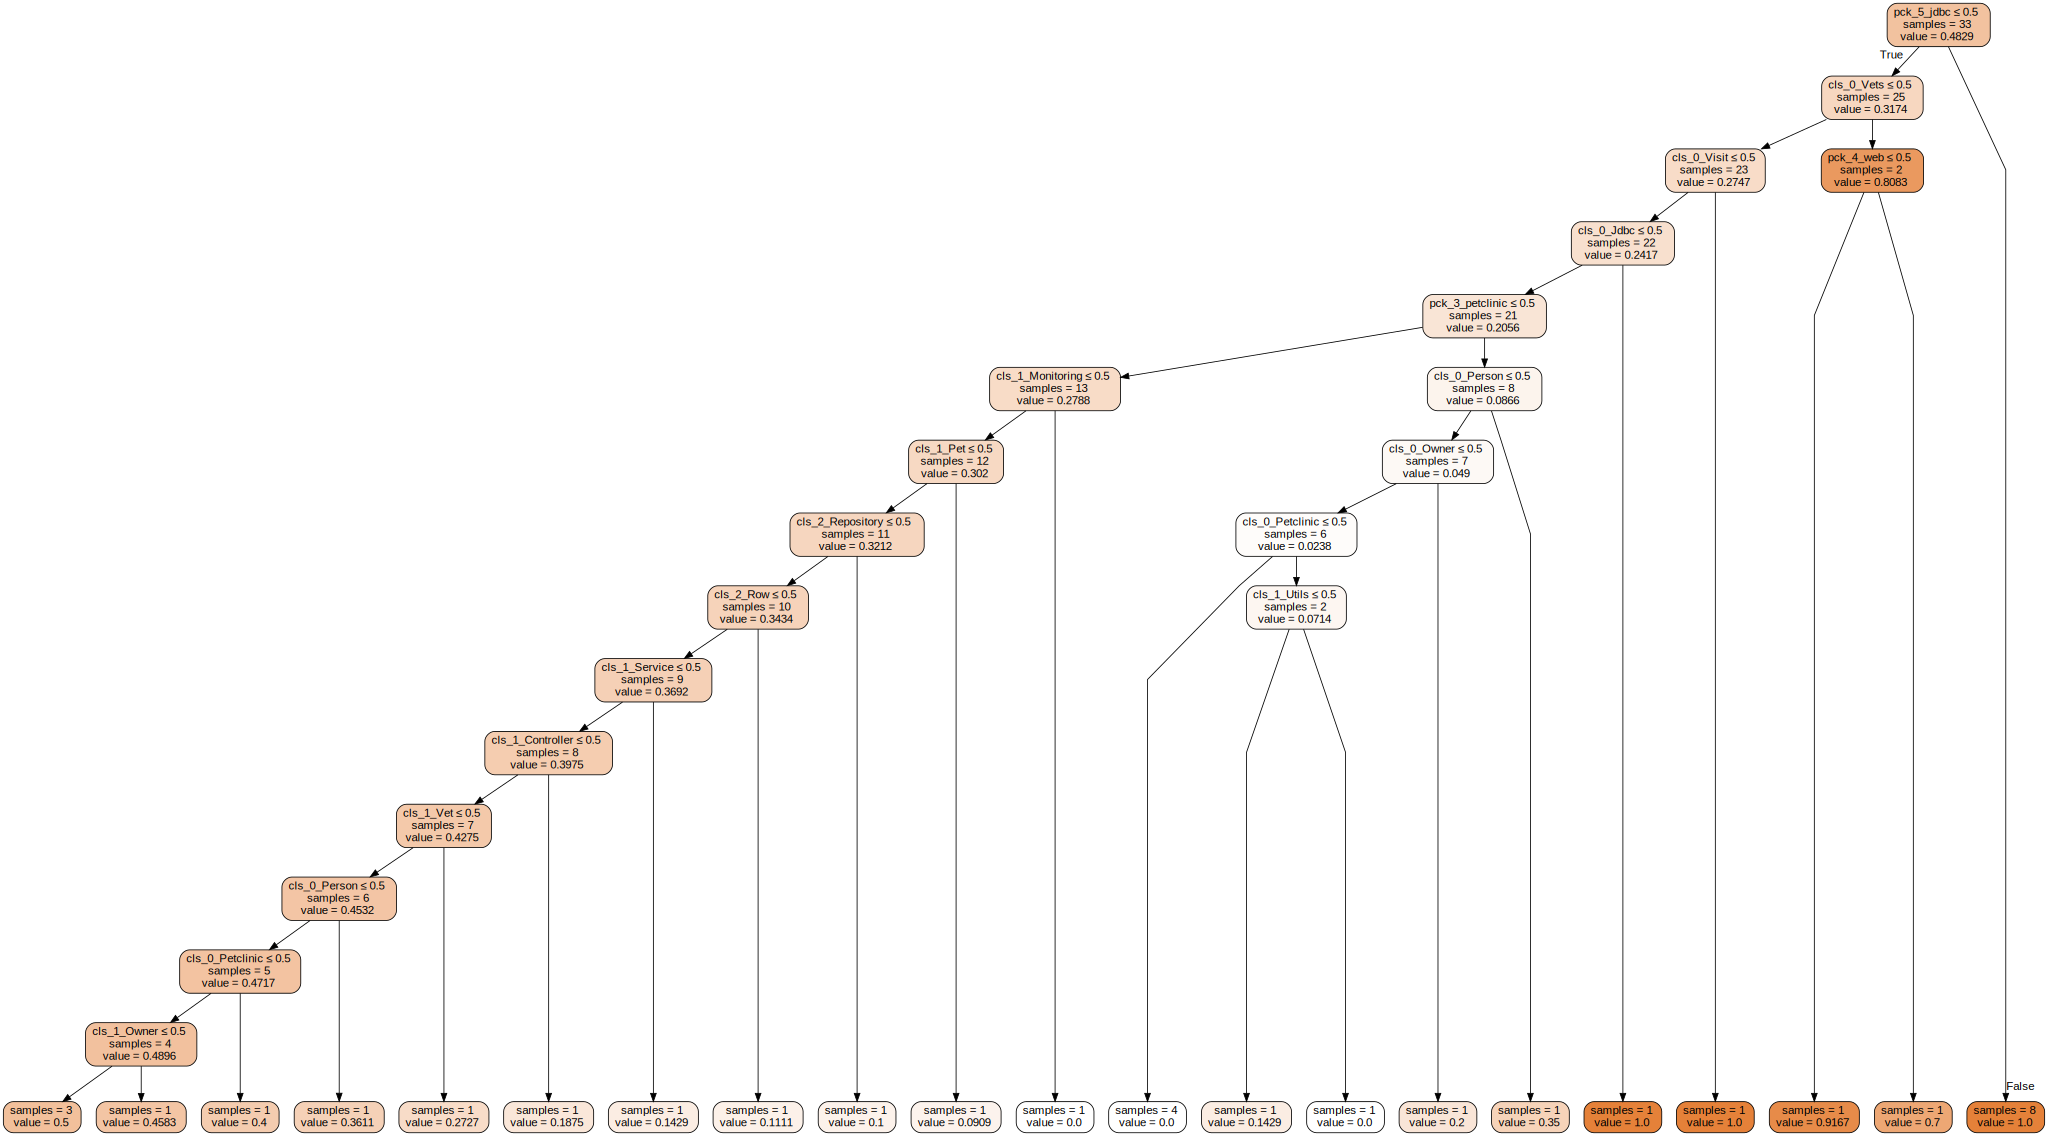

In [216]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=complete_data.columns,  
                         filled=True, rounded=True,  
                         special_characters=True,
                        impurity=False, leaves_parallel =True)  
graph = graphviz.Source(dot_data) 
graph.render("app4")
graph

In [221]:
complete_data.describe().to_excel("temp.xlsx")

In [209]:
tree.export_graphviz?

In [155]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("app") 

'app.pdf'

In [64]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeRegressor()
clf = clf.fit(iris.data, iris.target)